In [1]:
import gzip
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py

In [2]:

from matplotlib.colors import LogNorm
fontsize = 18
def hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    plt.figure(figsize=(8, 6))
    #bins = np.linspace(0, max(np.max(x1),np.max(x2)), 50) if predefined_bins else 'auto'
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    errors1 = np.sqrt(n1)
    if not density: plt.errorbar(bin_centers, n1, yerr=errors1, color='orange',fmt='none')
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    errors2 = np.sqrt(n2)
    if not density: plt.errorbar(bin_centers, n2, yerr=errors2, color='blue',fmt='none')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def hist2d(x, x_fs, W = None, W_fs = None, fontsize=12, title1 = 'Enriched Sample', title2 = 'Full Sample'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)
    fig.tight_layout()

    # First histogram (Enriched Sample)
    h1, xedges, yedges, im1 = axes[0].hist2d(*x, bins=50, cmap='viridis', norm=LogNorm(vmax=3e3), density=False, weights=W)
    axes[0].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[0].set_ylabel('$P_t$ [GeV]', fontsize=fontsize)
    axes[0].set_title(title1, fontsize=fontsize)
    cbar1 = fig.colorbar(im1, ax=axes[0], label='Density')

    # Second histogram (Full Sample)
    h2, _, _, im2 = axes[1].hist2d(*x_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm(), density=False, weights=W_fs)
    axes[1].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[1].set_title(title2, fontsize=fontsize)
    cbar2 = fig.colorbar(im2, ax=axes[1], label='Density')

    # Adjust tick parameters
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=fontsize)


def difference_hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    diff = n1-n2
    plt.close()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers for plotting

    plt.figure(figsize=(8, 6))
    plt.bar(bin_centers, diff, width=np.diff(bins), color='blue', edgecolor='black', alpha=0.7)

    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


In [3]:
with h5py.File('../data/muons/full_sample.h5', 'r') as f:
    px = f['px'][:]
    py = f['py'][:]
    pz = f['pz'][:]
    x = f['x'][:]
    y = f['y'][:]
    z = f['z'][:]
    pdg = f['pdg'][:]
    W = f['weight'][:]
pt = np.sqrt(px**2+py**2)
p = np.sqrt(px**2+py**2+pz**2)


with h5py.File('../data/muons/full_sample_after_target.h5', 'r') as f:
    px_after_target = f['px'][:]
    py_after_target = f['py'][:]
    pz_after_target = f['pz'][:]
    x_after_target = f['x'][:]
    y_after_target = f['y'][:]
    z_after_target = f['z'][:]
    pdg_after_target = f['pdg'][:]
    W_after_target = f['weight'][:]
pt_after_target = np.sqrt(px_after_target**2+py_after_target**2)
p_after_target = np.sqrt(px_after_target**2+py_after_target**2+pz_after_target**2)

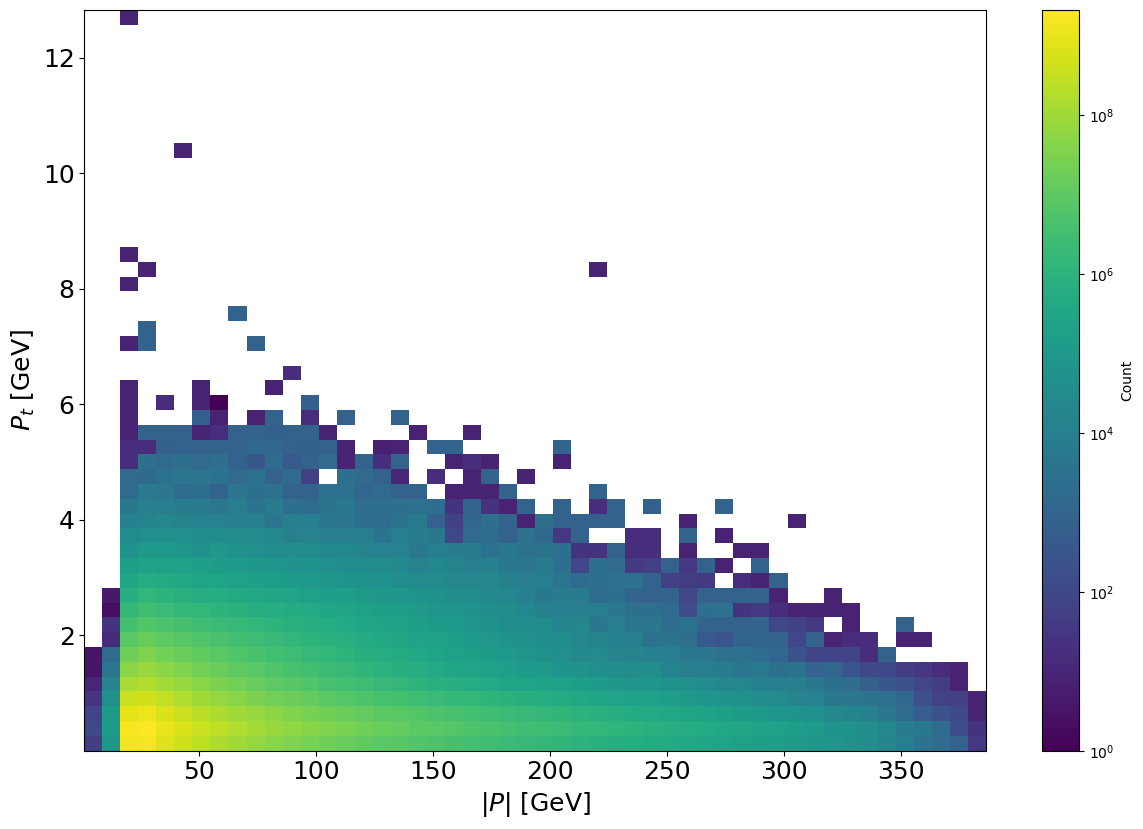

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8), sharey=True, sharex=True)
fig.tight_layout()

# First histogram (Enriched Sample)
h1, xedges, yedges, im1 = axes.hist2d(p,pt, bins=50, cmap='viridis', norm=LogNorm(), density=False, weights=W)
axes.set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
axes.set_ylabel('$P_t$ [GeV]', fontsize=fontsize)
cbar1 = fig.colorbar(im1, ax=axes, label='Count')


axes.tick_params(axis='both', which='major', labelsize=fontsize)
axes.tick_params(axis='both', which='minor', labelsize=fontsize)

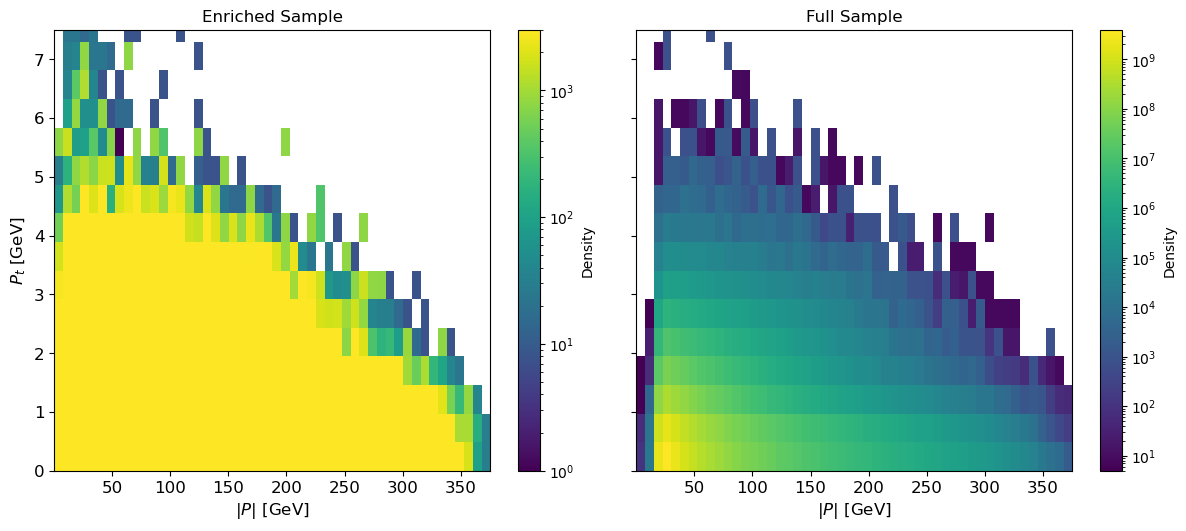

In [5]:
hist2d((p_after_target,pt_after_target),(p,pt), W=W_after_target, W_fs=W)
plt.ylim(0,7.5)
plt.show()

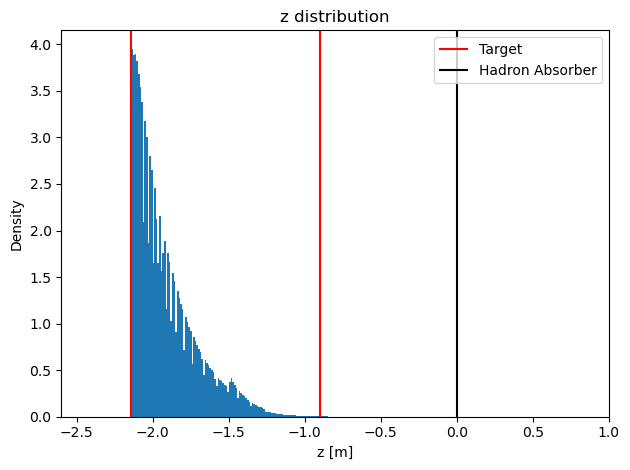

In [6]:
plt.hist(z, bins=200, density=True)
plt.title('z distribution')
plt.axvline(-2.14, color='red', label='Target')
plt.axvline(-0.9, color='red')
plt.axvline(0.0, color='black', label = 'Hadron Absorber')
plt.xlabel('z [m]')
plt.ylabel('Density')

plt.xlim(-2.6, 1)
plt.tight_layout()
plt.legend()
plt.show()

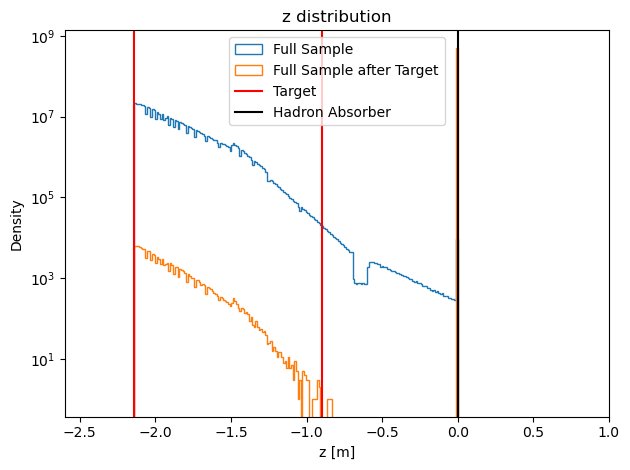

In [7]:
plt.hist(z, bins=200, density=False, log=True, histtype='step', label='Full Sample')
plt.hist(z_after_target, bins=200, density=False, log=True, histtype='step', label='Full Sample after Target')
plt.title('z distribution')
plt.axvline(-2.14, color='red', label='Target')
plt.axvline(-0.9, color='red')
plt.axvline(0.0, color='black', label = 'Hadron Absorber')
plt.xlabel('z [m]')
plt.ylabel('Density')

plt.xlim(-2.6, 1)
plt.tight_layout()
plt.legend()
plt.show()

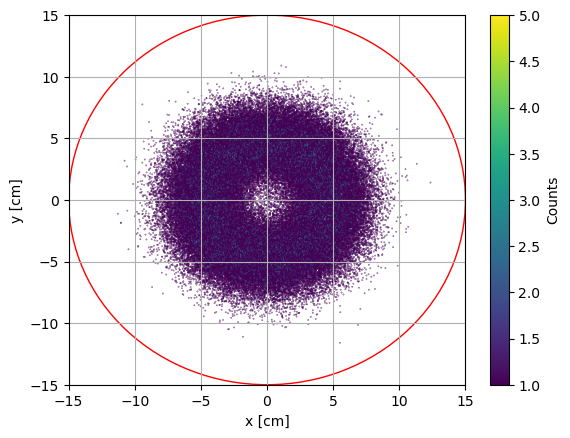

In [8]:
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.hexbin(x_after_target[z_after_target<-0.5]*100, y_after_target[z_after_target<-0.5]*100, gridsize=1000, cmap='viridis', mincnt=1)
circ = plt.Circle((0, 0), 15, color='r', fill=False)
plt.gca().add_patch(circ)
plt.colorbar(label='Counts')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.show()

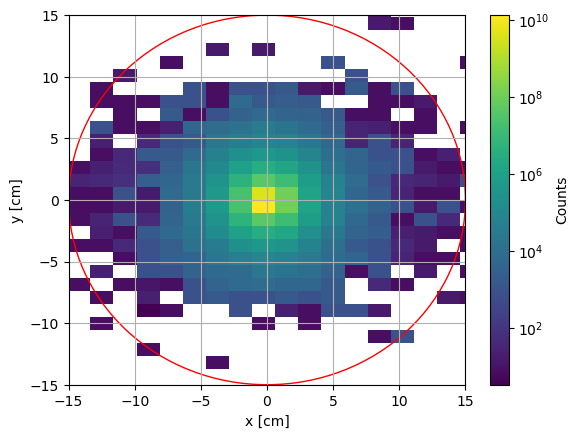

In [9]:
#plt.scatter(x*100,y*100, alpha = 0.1)

#plt.hist2d(x_full[z_full<-0.9]*100, y_full[z_full<-0.9]*100, bins=100, cmap='viridis')
plt.hist2d(x*100,y*100, bins=50, cmap='viridis', norm=LogNorm(), density=False, weights=W)
circ = plt.Circle((0, 0), 15, color='r', fill=False)
plt.gca().add_patch(circ)
plt.colorbar(label='Counts')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

#print('Total number of particles outside the cylinder:', np.sum(np.sqrt(x_full[z_full<-0.9]**2 + y_full[z_full<-0.9]**2)>0.15), f' (out of {data_full[z_full<-0.9].shape[0]})')
#print('Total number of WEIGHTED particles outside the cylinder:', np.sum(data_full[:,-1][z_full<-0.9][np.sqrt(x_full[z_full<-0.9]**2 + y_full[z_full<-0.9]**2)>0.15]), f' (out of {data_full[:,-1][z_full<-0.9].sum()})')
#print('Particles that already start after the target:', np.sum(z_full>0.9), f' (out of {data_full.shape[0]})')

In [10]:
def ring_trans(x,y, SmearBeam = 5):
    if SmearBeam > 0: #ring transformation
        sigma = 1.6
        gauss_x = np.random.normal(0, sigma, size=x.shape)
        gauss_y = np.random.normal(0, sigma, size=y.shape)
        uniform = np.random.uniform(0, 1, size=x.shape)
        _phi = uniform * 2 * np.pi
        dx = SmearBeam * np.cos(_phi) + gauss_x
        dy = SmearBeam * np.sin(_phi) + gauss_y
        x += dx / 100
        y += dy / 100
    return x, y

x_ring, y_ring = ring_trans(x, y, 5)

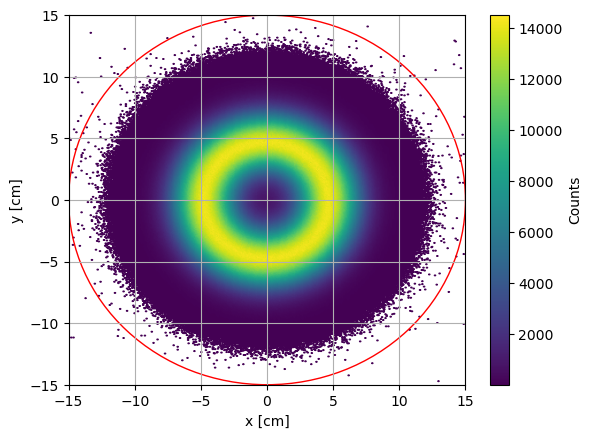

In [11]:
#plt.scatter(x*100,y*100, alpha = 0.1)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.hexbin(x_ring*100, y_ring*100, gridsize=1000, cmap='viridis', mincnt=1)
circ = plt.Circle((0, 0), 15, color='r', fill=False)
plt.gca().add_patch(circ)
plt.colorbar(label='Counts')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.show()


weight -0.0 : 39
Total: -0.0
weight 0.09369999915361404 : 3311
Total: 310.2406971976161
weight 1.0 : 20993
Total: 20993.0
weight 3.2616000175476074 : 691113
Total: 2254134.1729273796
weight 7.6875 : 480474935
Total: 3693651062.8125
weight 9.369999885559082 : 168445
Total: 1578329.6307229996
weight 326.1600036621094 : 11094133
Total: 3618462459.9079285
weight 768.75 : 13921031
Total: 10701792581.25


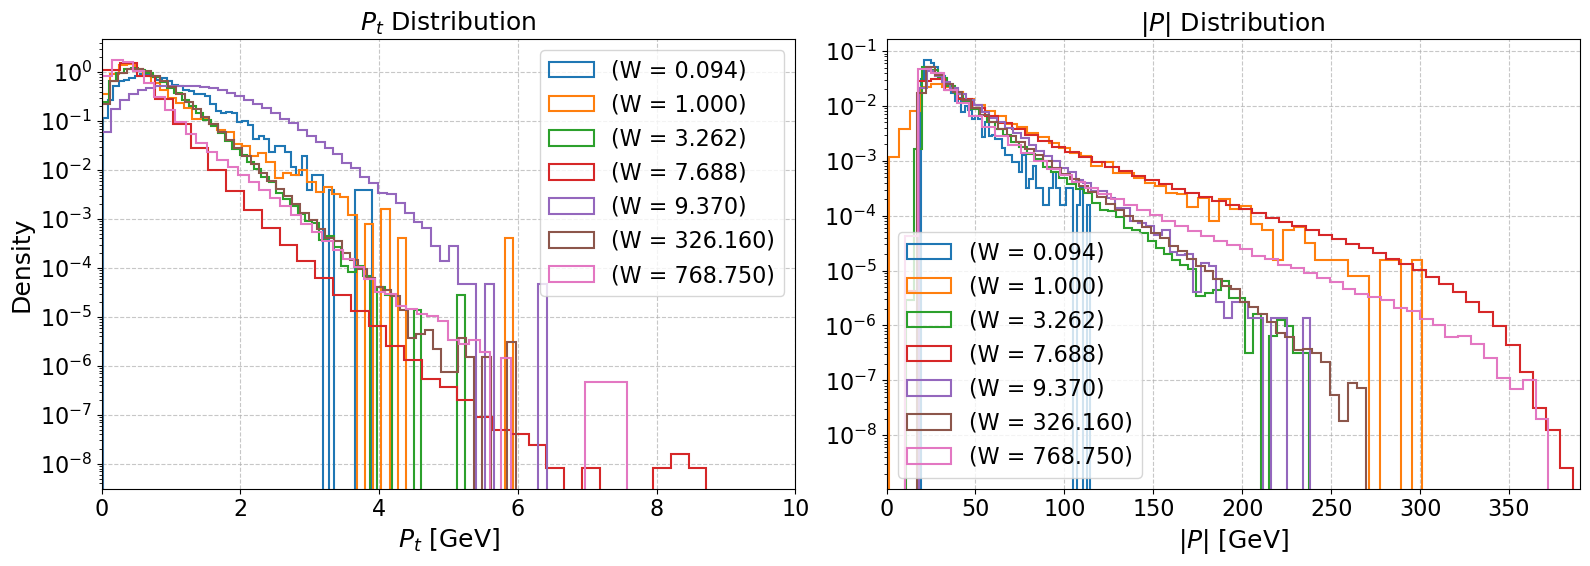

In [12]:
# This part for printing weight information remains the same
unique_W,n_w = np.unique(W,return_counts=True)
for w_val,n in zip(unique_W,n_w):
    print(f"weight {w_val} : {n}")
    print(f"Total: {w_val*n}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for w_val in unique_W:
    if w_val < 0.001: continue # Skip very small weights if necessary
    mask = W == w_val
    # Left subplot: Pt (Transverse Momentum)
    axes[0].hist(pt[mask], bins=50, histtype='step', linewidth=1.5, label=f"(W = {w_val:.3f})", density = True)

    # Right subplot: P (Total Momentum)
    axes[1].hist(p[mask], bins=50, histtype='step', linewidth=1.5, label=f'(W = {w_val:.3f})', density = True)
axes[1].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
# axes[1].set_ylabel('Counts', fontsize=fontsize) # Y-label can be shared if plots are similar
axes[1].set_title(f'$|P|$ Distribution', fontsize=fontsize)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize-2)
axes[1].set_yscale('log') # Use log scale for y-axis
axes[1].set_xlim(0, 390)  # Set x-axis limits based on original hist2d's |P| range
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(fontsize=fontsize-2)

axes[0].set_xlabel('$P_t$ [GeV]', fontsize=fontsize)
axes[0].set_ylabel('Density', fontsize=fontsize)
axes[0].set_title(f'$P_t$ Distribution', fontsize=fontsize)
axes[0].tick_params(axis='both', which='major', labelsize=fontsize-2)
axes[0].set_yscale('log') # Use log scale for y-axis
axes[0].set_xlim(0, 10)   # Set x-axis limits based on original hist2d's P_t range
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(fontsize=fontsize-2)


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()

weight -0.0 : 39
Total: -0.0
weight 0.09369999915361404 : 3311
Total: 310.2406971976161
weight 1.0 : 20993
Total: 20993.0
weight 3.2616000175476074 : 691113
Total: 2254134.1729273796
weight 7.6875 : 480474935
Total: 3693651062.8125
weight 9.369999885559082 : 168445
Total: 1578329.6307229996
weight 326.1600036621094 : 11094133
Total: 3618462459.9079285
weight 768.75 : 13921031
Total: 10701792581.25


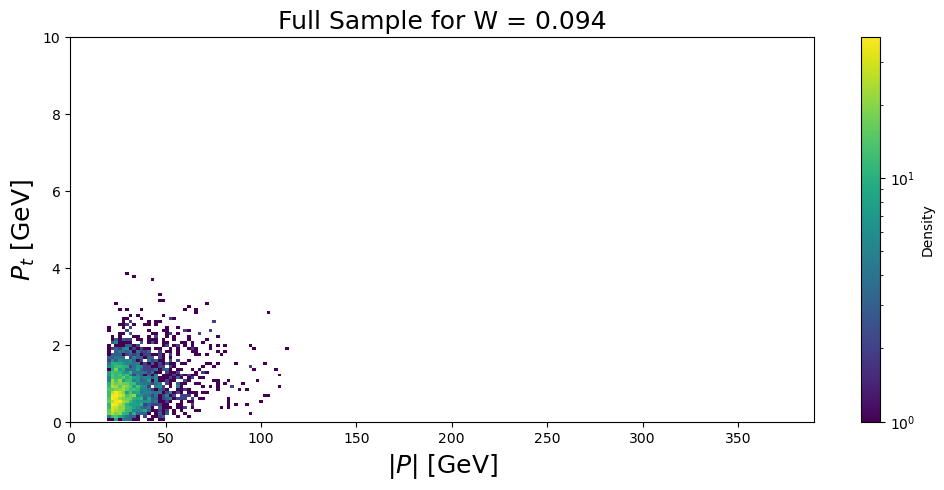

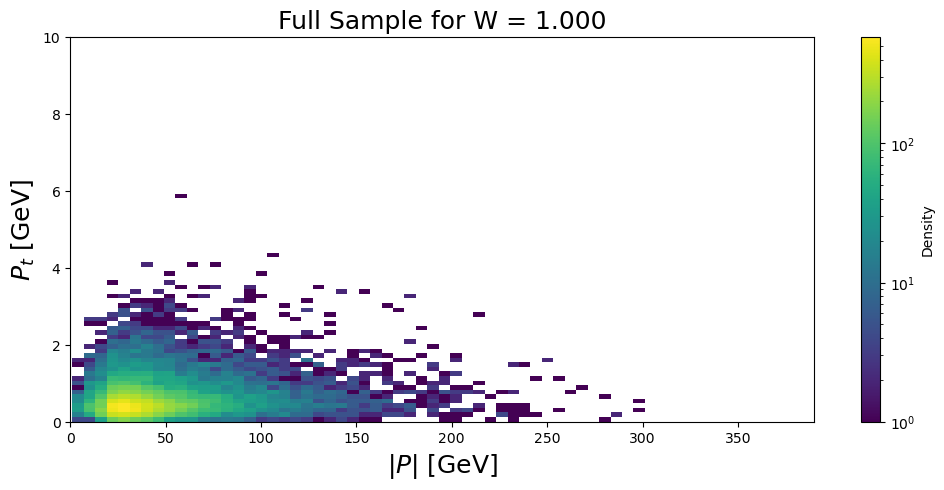

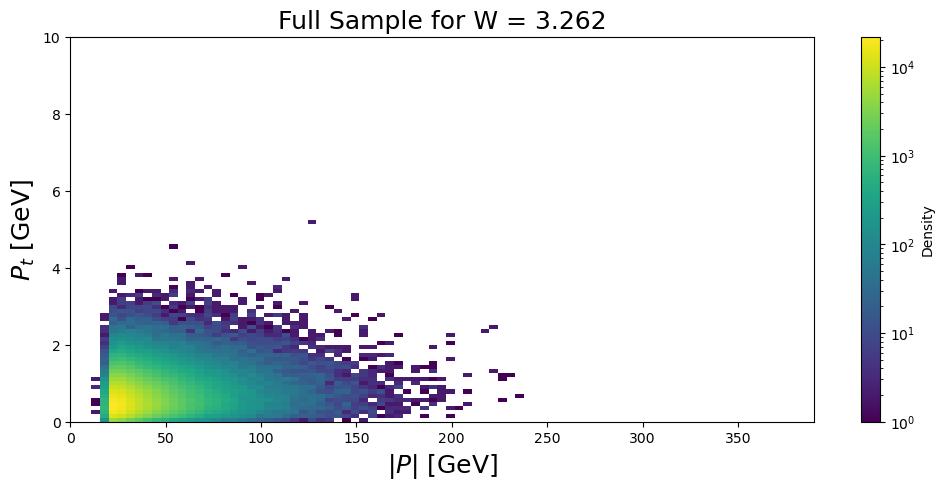

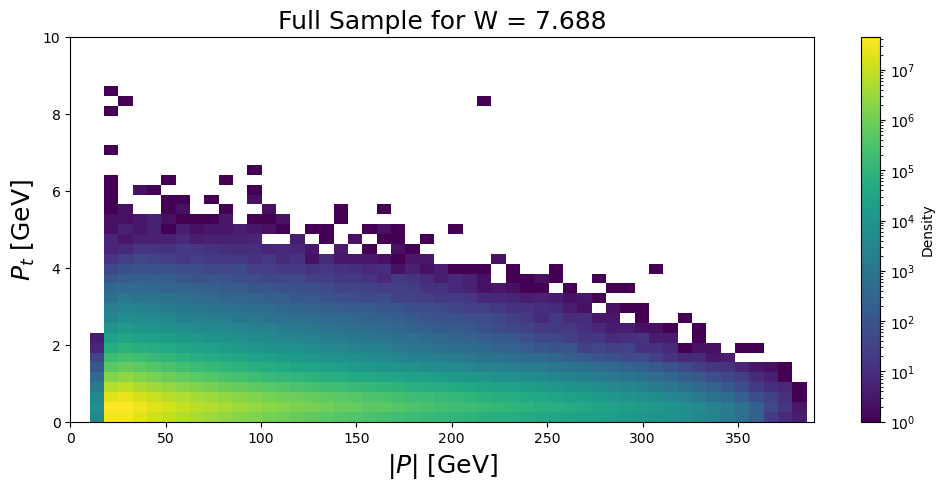

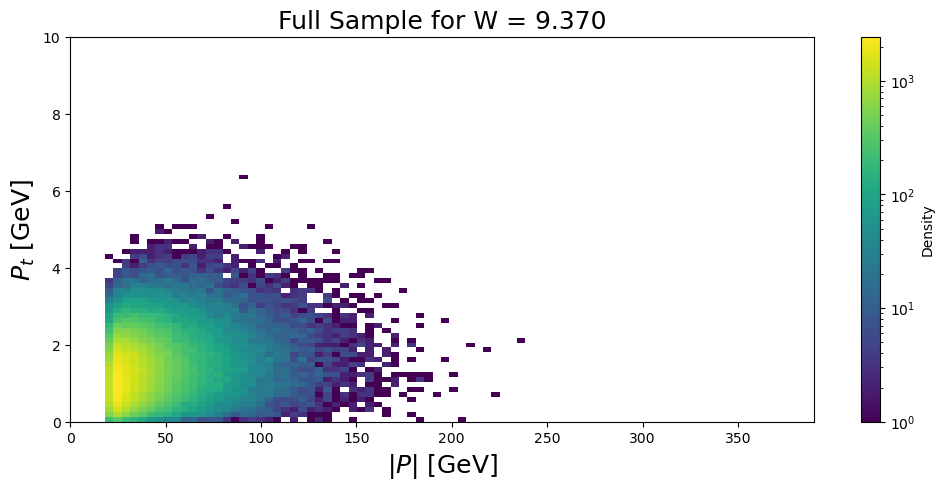

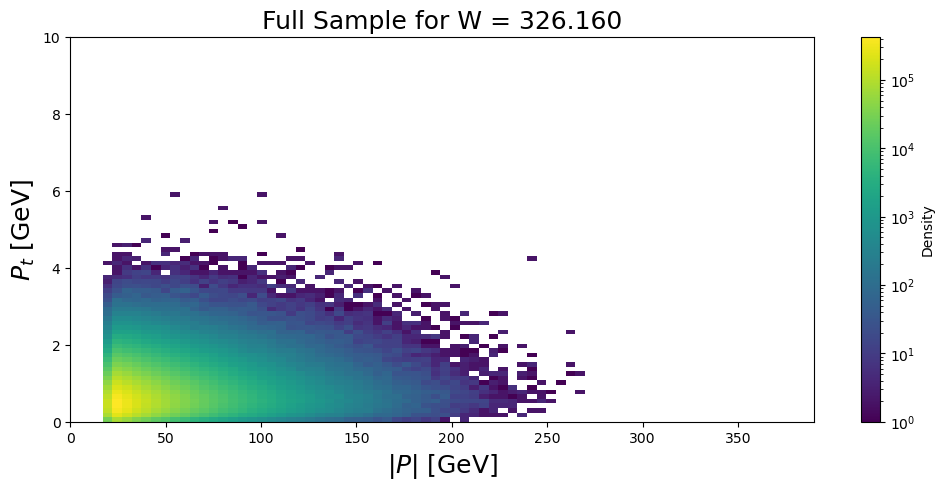

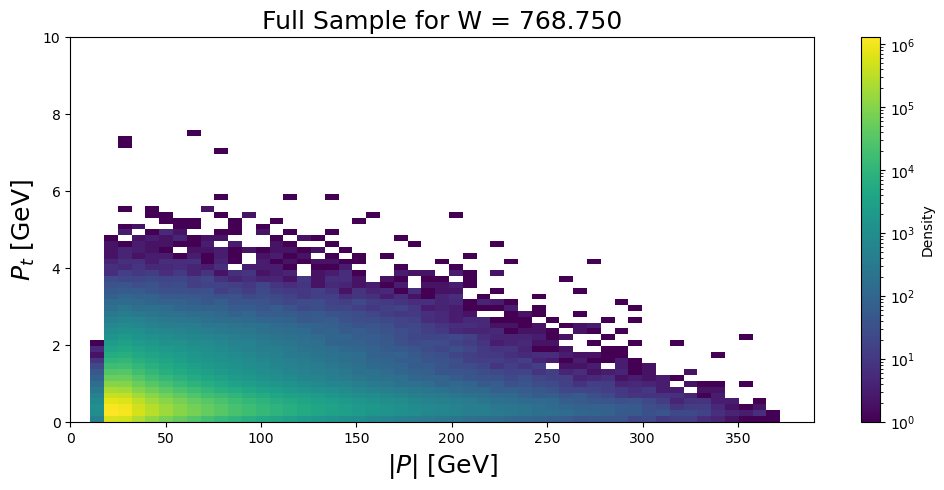

In [13]:
unique_W,n_w = np.unique(W,return_counts=True)
for w_val,n in zip(unique_W,n_w):
    print(f"weight {w_val} : {n}")
    print(f"Total: {w_val*n}")

for w_val in unique_W:
    if w_val < 0.001: continue
    mask = W == w_val
    plt.figure(figsize=(12, 5))
    plt.hist2d(p[mask], pt[mask], bins=50, cmap='viridis', norm=LogNorm(), density=False)
    plt.xlabel('$|P|$ [GeV]', fontsize=fontsize)
    plt.ylabel('$P_t$ [GeV]', fontsize=fontsize)
    plt.title(f'Full Sample for W = {w_val:.3f}', fontsize=fontsize)
    plt.colorbar(label='Density')
    plt.xlim(0, 390)
    plt.ylim(0,10)
    plt.show()


NameError: name 'p_full' is not defined

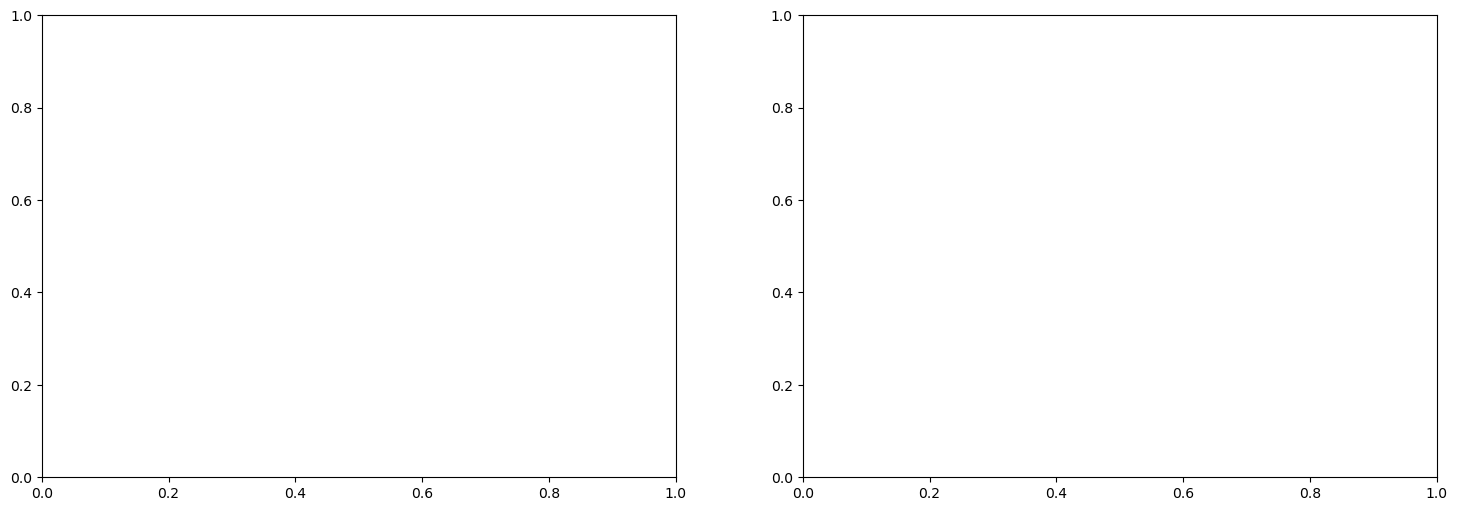

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Left plot for p_full
axes[0].hist(p_full, bins=100, label='Full Sample', color='blue', log=True, histtype='step')
axes[0].set_xlabel('|P| [GeV]', fontsize=fontsize)
axes[0].set_ylabel('Counts', fontsize=fontsize)
axes[0].set_title('Full Sample Momentum Distribution', fontsize=fontsize)
axes[0].legend()

# Right plot for p
axes[1].hist(p, bins=100, label='Enriched Sample', color='orange', log=True, histtype='step')
axes[1].set_xlabel('|P| [GeV]', fontsize=fontsize)
axes[1].set_ylabel('Counts', fontsize=fontsize)
axes[1].set_title('Enriched Sample Momentum Distribution', fontsize=fontsize)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# First subplot for p
axes[0].hist(p_full, bins='auto', histtype='step', label='Full Sample', density = True)
axes[0].hist(p, bins='auto', histtype='step', label='Enriched Sample', density = True)
axes[0].set_yscale('log')
axes[0].set_xlabel('p [GeV]')
axes[0].set_ylabel('Counts')
axes[0].legend()
axes[0].set_title('Momentum Distribution')

# Second subplot for pt
axes[1].hist(pt_full, bins='auto', histtype='step', label='Full Sample', density = True)
axes[1].hist(pt, bins='auto', histtype='step', label='Enriched Sample', density = True)
axes[1].set_yscale('log')
axes[1].set_xlabel('pt [GeV]')
axes[1].set_ylabel('Counts')
axes[1].legend()
axes[1].set_title('Transverse Momentum Distribution')

# Third subplot for pz
axes[2].hist(pz_full, bins='auto', histtype='step', label='Full Sample', density = True)
axes[2].hist(pz, bins='auto', histtype='step', label='Enriched Sample', density = True)
axes[2].set_yscale('log')
axes[2].set_xlabel('pz [GeV]')
axes[2].set_ylabel('Counts')
axes[2].legend()
axes[2].set_title('Longitudinal Momentum Distribution')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# First subplot for p
axes[0].hist(px_full, bins='auto', histtype='step', label='Full Sample')
axes[0].hist(px, bins='auto', histtype='step', label='Enriched Sample')
axes[0].set_yscale('log')
axes[0].set_xlabel('px [GeV]')
axes[0].set_ylabel('Counts')
axes[0].legend()
axes[0].set_title('Momentum Distribution')

# Second subplot for pt
axes[1].hist(py_full, bins='auto', histtype='step', label='Full Sample')
axes[1].hist(py, bins='auto', histtype='step', label='Enriched Sample')
axes[1].set_yscale('log')
axes[1].set_xlabel('py [GeV]')
axes[1].set_ylabel('Counts')
axes[1].legend()
axes[1].set_title('Transverse Momentum Distribution')

# Third subplot for pz
axes[2].hist(pz_full, bins='auto', histtype='step', label='Full Sample')
axes[2].hist(pz, bins='auto', histtype='step', label='Enriched Sample')
axes[2].set_yscale('log')
axes[2].set_xlabel('pz [GeV]')
axes[2].set_ylabel('Counts')
axes[2].legend()
axes[2].set_title('Longitudinal Momentum Distribution')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Calculate unique values and counts for W
unique_W, counts_W = np.unique(W, return_counts=True)
table_W = np.asarray((unique_W.round(2), counts_W)).T

# Calculate unique values and counts for W_full
unique_W_full, counts_W_full = np.unique(W_full, return_counts=True)
table_W_full = np.asarray((unique_W_full.round(2), counts_W_full)).T

# Create pandas DataFrames from the tables
df_W = pd.DataFrame(table_W, columns=['Unique Values', 'Counts'])
df_W_full = pd.DataFrame(table_W_full, columns=['Unique Values', 'Counts'])

# Calculate and print the total ratio of each unique value
df_W['Ratio'] = df_W['Counts'] / df_W['Counts'].sum()
df_W_full['Ratio'] = df_W_full['Counts'] / df_W_full['Counts'].sum()

print("Ratios for W:")
print(df_W[['Unique Values', 'Ratio']])

print("\nRatios for W_full:")
print(df_W_full[['Unique Values', 'Ratio']])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for W
# Normalize the counts for W
df_W['Normalized Counts'] = df_W['Counts'] / df_W['Counts'].sum()
df_W.plot(x='Unique Values', y='Normalized Counts', kind='bar', ax=axes[0])
axes[0].set_xlabel('Unique Values')
axes[0].set_ylabel('Normalized Counts')
axes[0].set_title('Normalized Counts of Unique Values in W')

# Normalize the counts for W_full
df_W_full['Normalized Counts'] = df_W_full['Counts'] / df_W_full['Counts'].sum()
df_W_full.plot(x='Unique Values', y='Normalized Counts', kind='bar', ax=axes[1])
axes[1].set_xlabel('Unique Values')
axes[1].set_ylabel('Normalized Counts')
axes[1].set_title('Normalized Counts of Unique Values in W_full')

plt.tight_layout()
plt.show()

In [ ]:
#plt.hist(W_full, bins = 'auto', histtype='step', label= "Full Sample")
plt.hist(W, bins = 50, histtype='step', label = "Enriched Sample")
plt.show()


In [ ]:
for pdg in np.unique(pdg_full):
    mask = pdg_full == pdg
    plt.figure(figsize=(12, 8))
    plt.hist2d(p_full[mask], pt_full[mask], bins=50, cmap='viridis', norm=LogNorm(), density=False)
    plt.xlabel('$|P|$ [GeV]', fontsize=fontsize)
    plt.ylabel('$P_t$ [GeV]', fontsize=fontsize)
    plt.title(f'Full Sample for PDG = {pdg} ({W_full[mask].sum()*100/W_full.sum():.2f}%)', fontsize=fontsize)
    plt.colorbar(label='Density')
    plt.xlim(0, 390)
    plt.ylim(0,10)
    plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6))
for pdg_val in np.unique(pdg_full): # Renamed pdg to pdg_val to avoid conflict with the variable from cell 4
    mask = pdg_full == pdg_val
    # First subplot for p
    axes[0].hist(p_full[mask], bins=50, histtype='step', label= f'Full Sample for PDG = {pdg_val} ({W_full[mask].sum()*100/W_full.sum():.2f}%)', density = True, weights=W_full[mask])

    axes[1].hist(pt_full[mask], bins=50, histtype='step', density = True, weights=W_full[mask]) # Removed label here as it would overwrite

axes[0].set_yscale('log')
axes[0].set_xlabel('p [GeV]', fontsize=fontsize)
axes[0].set_ylabel('Counts', fontsize=fontsize)
axes[0].legend(fontsize=fontsize)
axes[0].set_title('Momentum Distribution', fontsize=fontsize)
axes[0].tick_params(axis='both', which='major', labelsize=fontsize)


axes[1].set_yscale('log')
axes[1].set_xlabel('pt [GeV]', fontsize=fontsize)
axes[1].set_ylabel('Counts', fontsize=fontsize)
axes[1].set_title('Transverse Momentum Distribution', fontsize=fontsize)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize)


plt.tight_layout()
plt.show()

In [ ]:
# Calculate the bin edges for p_full
bins = np.linspace(p_full.min(), p_full.max(), 51)  # 50 bins

# Mask for PDG 13
mask_13 = pdg_full == 13

# Histogram counts for PDG 13 and for all particles
counts_13, _ = np.histogram(p_full[mask_13], bins=bins, weights=W_full[mask_13])
counts_all, _ = np.histogram(p_full, bins=bins, weights=W_full)

# Avoid division by zero
proportion_13 = np.divide(counts_13, counts_all, out=np.zeros_like(counts_13), where=counts_all!=0) * 100

# Bin centers for plotting
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(12, 6))
plt.bar(bin_centers, proportion_13, width=np.diff(bins), align='center', alpha=0.7, color='tab:blue')
plt.xlabel('|P| [GeV]', fontsize=fontsize)
plt.ylabel(r'Proportion of $\mu^{-}$[%]', fontsize=fontsize)
plt.title(r'Proportion of $\mu^{-}$ per |P| bin', fontsize=fontsize)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()